In [14]:
#Import Libraries

import os, warnings
os.environ["OMP_NUM_THREADS"] = "1"   # ✅ Fix MKL threading issue on Windows
warnings.filterwarnings("ignore", category=UserWarning)  # ✅ Hide warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [15]:
# Load Dataset
df = pd.read_csv(r"C:\Users\janap\Downloads\archive (4)\Mall_Customers.csv")

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
#  Step 3: Preprocessing

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

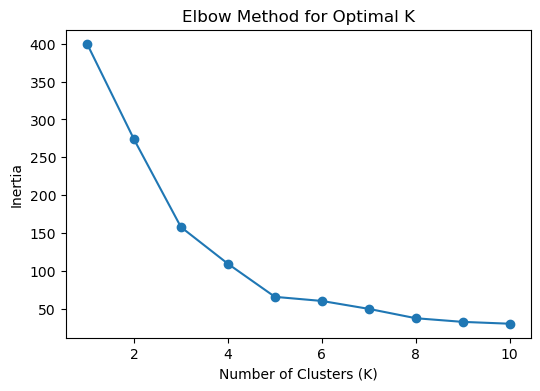

In [16]:
# Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [17]:
# Fit KMeans
optimal_k = 5   # pick based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels
print("Cluster counts:\n", df['Cluster'].value_counts())

Cluster counts:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


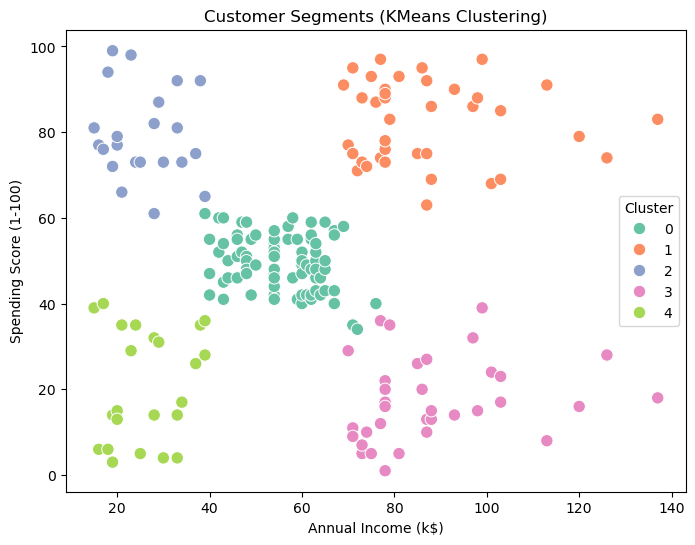

In [18]:
#Visualize Clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], 
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'], 
                palette="Set2", s=80)
plt.title("Customer Segments (KMeans Clustering)")
plt.show()


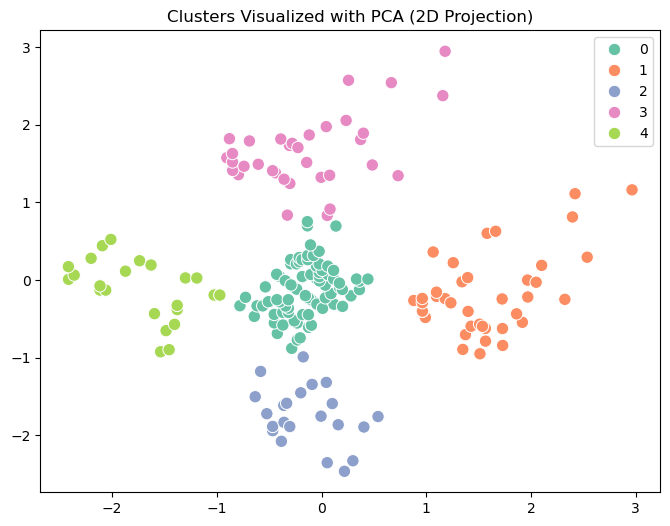

In [19]:
# PCA for High-Dimensional Data 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], 
                hue=labels, palette="Set2", s=80)
plt.title("Clusters Visualized with PCA (2D Projection)")
plt.show()

In [20]:
# Evaluate Clustering
sil_score = silhouette_score(X_scaled, labels)
print("✅ Silhouette Score:", sil_score)

✅ Silhouette Score: 0.5546571631111091
